In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier, Pool


In [2]:
df = pd.read_excel("ODI ENGLAND.xlsx")
df.head()

,,Date,Series,Ground,Result,Toss Winner
0,1,1973-09-05,1973 England v. West Indies,Headingley,England won by 1 wicket,West Indies won the toss and elected to bat
1,2,1973-09-07,1973 England v. West Indies,Kennington Oval,West Indies won by 8 wickets,England won the toss and elected to bat
2,3,1976-08-26,1976 England v. West Indies,North Marine Road Ground,West Indies won by 6 wickets,West Indies won the toss and elected to field
3,4,1976-08-28,1976 England v. West Indies,Lord's,West Indies won by 36 runs,England won the toss and elected to field
4,5,1976-08-30,1976 England v. West Indies,Edgbaston,West Indies won by 50 runs,England won the toss and elected to field


In [3]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
                0
Date           0
Series         0
Ground         0
Result         0
Toss Winner    0
dtype: int64


In [4]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.head()

,,Date,Series,Ground,Result,Toss Winner,Year,Month,Day
0,1,1973-09-05,1973 England v. West Indies,Headingley,England won by 1 wicket,West Indies won the toss and elected to bat,1973,9,5
1,2,1973-09-07,1973 England v. West Indies,Kennington Oval,West Indies won by 8 wickets,England won the toss and elected to bat,1973,9,7
2,3,1976-08-26,1976 England v. West Indies,North Marine Road Ground,West Indies won by 6 wickets,West Indies won the toss and elected to field,1976,8,26
3,4,1976-08-28,1976 England v. West Indies,Lord's,West Indies won by 36 runs,England won the toss and elected to field,1976,8,28
4,5,1976-08-30,1976 England v. West Indies,Edgbaston,West Indies won by 50 runs,England won the toss and elected to field,1976,8,30


In [5]:
df = df.drop(columns=['Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0                98 non-null     int64 
 1   Series       98 non-null     object
 2   Ground       98 non-null     object
 3   Result       98 non-null     object
 4   Toss Winner  98 non-null     object
 5   Year         98 non-null     int32 
 6   Month        98 non-null     int32 
 7   Day          98 non-null     int32 
dtypes: int32(3), int64(1), object(4)
memory usage: 5.1+ KB


In [7]:
df = df.iloc[:, 1:]

In [8]:
df

,Series,Ground,Result,Toss Winner,Year,Month,Day
0,1973 England v. West Indies,Headingley,England won by 1 wicket,West Indies won the toss and elected to bat,1973,9,5
1,1973 England v. West Indies,Kennington Oval,West Indies won by 8 wickets,England won the toss and elected to bat,1973,9,7
2,1976 England v. West Indies,North Marine Road Ground,West Indies won by 6 wickets,West Indies won the toss and elected to field,1976,8,26
3,1976 England v. West Indies,Lord's,West Indies won by 36 runs,England won the toss and elected to field,1976,8,28
4,1976 England v. West Indies,Edgbaston,West Indies won by 50 runs,England won the toss and elected to field,1976,8,30
...,...,...,...,...,...,...,...
93,2018-2019 West Indies v. England,Daren Sammy National Cricket Stadium,West Indies won by 7 wickets,West Indies won the toss and elected to field,2019,3,1
94,2019 ICC World Cup,The Rose Bowl,England won by 8 wickets,England won the toss and elected to field,2019,6,14
95,2023-2024 West Indies v. England,Sir Vivian Richards Stadium,West Indies won by 4 wickets,England won the toss and elected to bat,2023,12,3
96,2023-2024 West Indies v. England,Sir Vivian Richards Stadium,England won by 4 wickets,England won the toss and elected to field,2023,12,6


In [9]:

df['Winning_Team'] = df['Result'].str.extract(r'(\b.*\b) won')[0]


df['Won_By_Runs'] = df['Result'].str.extract(r'won by (\d+) runs')[0].astype(float)
df['Won_By_Wickets'] = df['Result'].str.extract(r'won by (\d+) wicket')[0].astype(float)


df.head()


,Series,Ground,Result,Toss Winner,Year,Month,Day,Winning_Team,Won_By_Runs,Won_By_Wickets
0,1973 England v. West Indies,Headingley,England won by 1 wicket,West Indies won the toss and elected to bat,1973,9,5,England,NaN,1.0
1,1973 England v. West Indies,Kennington Oval,West Indies won by 8 wickets,England won the toss and elected to bat,1973,9,7,West Indies,NaN,8.0
2,1976 England v. West Indies,North Marine Road Ground,West Indies won by 6 wickets,West Indies won the toss and elected to field,1976,8,26,West Indies,NaN,6.0
3,1976 England v. West Indies,Lord's,West Indies won by 36 runs,England won the toss and elected to field,1976,8,28,West Indies,36.0,NaN
4,1976 England v. West Indies,Edgbaston,West Indies won by 50 runs,England won the toss and elected to field,1976,8,30,West Indies,50.0,NaN


In [10]:

df['Toss_Winner_Team'] = df['Toss Winner'].str.extract(r'(\b.*\b) won')[0]
df['Elected'] = df['Toss Winner'].str.extract(r'and elected to (\b.*\b)')[0]
df.head()

,Series,Ground,Result,Toss Winner,Year,Month,Day,Winning_Team,Won_By_Runs,Won_By_Wickets,Toss_Winner_Team,Elected
0,1973 England v. West Indies,Headingley,England won by 1 wicket,West Indies won the toss and elected to bat,1973,9,5,England,NaN,1.0,West Indies,bat
1,1973 England v. West Indies,Kennington Oval,West Indies won by 8 wickets,England won the toss and elected to bat,1973,9,7,West Indies,NaN,8.0,England,bat
2,1976 England v. West Indies,North Marine Road Ground,West Indies won by 6 wickets,West Indies won the toss and elected to field,1976,8,26,West Indies,NaN,6.0,West Indies,field
3,1976 England v. West Indies,Lord's,West Indies won by 36 runs,England won the toss and elected to field,1976,8,28,West Indies,36.0,NaN,England,field
4,1976 England v. West Indies,Edgbaston,West Indies won by 50 runs,England won the toss and elected to field,1976,8,30,West Indies,50.0,NaN,England,field


In [11]:
df = df.drop(columns=['Result', 'Toss Winner'])
df.head()

,Series,Ground,Year,Month,Day,Winning_Team,Won_By_Runs,Won_By_Wickets,Toss_Winner_Team,Elected
0,1973 England v. West Indies,Headingley,1973,9,5,England,NaN,1.0,West Indies,bat
1,1973 England v. West Indies,Kennington Oval,1973,9,7,West Indies,NaN,8.0,England,bat
2,1976 England v. West Indies,North Marine Road Ground,1976,8,26,West Indies,NaN,6.0,West Indies,field
3,1976 England v. West Indies,Lord's,1976,8,28,West Indies,36.0,NaN,England,field
4,1976 England v. West Indies,Edgbaston,1976,8,30,West Indies,50.0,NaN,England,field


In [12]:
df['Won_By_Runs'] = df['Won_By_Runs'].fillna(0)
df['Won_By_Wickets'] = df['Won_By_Wickets'].fillna(0)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Series            98 non-null     object 
 1   Ground            98 non-null     object 
 2   Year              98 non-null     int32  
 3   Month             98 non-null     int32  
 4   Day               98 non-null     int32  
 5   Winning_Team      98 non-null     object 
 6   Won_By_Runs       98 non-null     float64
 7   Won_By_Wickets    98 non-null     float64
 8   Toss_Winner_Team  98 non-null     object 
 9   Elected           98 non-null     object 
dtypes: float64(2), int32(3), object(5)
memory usage: 6.6+ KB


In [14]:
df[['Series_Year', 'Series_Type']] = df['Series'].str.split(' ', n=1, expand=True)
df.head()
print(df.columns)


Index(['Series', 'Ground', 'Year', 'Month', 'Day', 'Winning_Team',
       'Won_By_Runs', 'Won_By_Wickets', 'Toss_Winner_Team', 'Elected',
       'Series_Year', 'Series_Type'],
      dtype='object')


In [15]:
df = df.drop(columns=['Series','Series_Year'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ground            98 non-null     object 
 1   Year              98 non-null     int32  
 2   Month             98 non-null     int32  
 3   Day               98 non-null     int32  
 4   Winning_Team      98 non-null     object 
 5   Won_By_Runs       98 non-null     float64
 6   Won_By_Wickets    98 non-null     float64
 7   Toss_Winner_Team  98 non-null     object 
 8   Elected           98 non-null     object 
 9   Series_Type       98 non-null     object 
dtypes: float64(2), int32(3), object(5)
memory usage: 6.6+ KB


In [16]:
df['Winning_Team'] = df['Winning_Team'].replace({'West Indies': 0, 'England': 1})
df['Toss_Winner_Team'] = df['Toss_Winner_Team'].replace({'West Indies': 0, 'England': 1})
df['Elected'] = df['Elected'].replace({'bat': 0, 'field': 1})

df


C:\Users\trina.LAPY\AppData\Local\Temp\ipykernel_11356\14695913.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Winning_Team'] = df['Winning_Team'].replace({'West Indies': 0, 'England': 1})
C:\Users\trina.LAPY\AppData\Local\Temp\ipykernel_11356\14695913.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Toss_Winner_Team'] = df['Toss_Winner_Team'].replace({'West Indies': 0, 'England': 1})
C:\Users\trina.LAPY\AppData\Local\Temp\ipykernel_11356\14695913.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated

,Ground,Year,Month,Day,Winning_Team,Won_By_Runs,Won_By_Wickets,Toss_Winner_Team,Elected,Series_Type
0,Headingley,1973,9,5,1,0.0,1.0,0,0,England v. West Indies
1,Kennington Oval,1973,9,7,0,0.0,8.0,1,0,England v. West Indies
2,North Marine Road Ground,1976,8,26,0,0.0,6.0,0,1,England v. West Indies
3,Lord's,1976,8,28,0,36.0,0.0,1,1,England v. West Indies
4,Edgbaston,1976,8,30,0,50.0,0.0,1,1,England v. West Indies
...,...,...,...,...,...,...,...,...,...,...
93,Daren Sammy National Cricket Stadium,2019,3,1,0,0.0,7.0,0,1,West Indies v. England
94,The Rose Bowl,2019,6,14,1,0.0,8.0,1,1,ICC World Cup
95,Sir Vivian Richards Stadium,2023,12,3,0,0.0,4.0,1,0,West Indies v. England
96,Sir Vivian Richards Stadium,2023,12,6,1,0.0,4.0,1,1,West Indies v. England


In [17]:
print("Current DataFrame columns:", df.columns.tolist())

Current DataFrame columns: ['Ground', 'Year', 'Month', 'Day', 'Winning_Team', 'Won_By_Runs', 'Won_By_Wickets', 'Toss_Winner_Team', 'Elected', 'Series_Type']


In [18]:
df = pd.get_dummies(df, columns=['Ground', 'Series_Type'], drop_first=True)
df = df.astype(int)
df

,Year,Month,Day,Winning_Team,Won_By_Runs,Won_By_Wickets,Toss_Winner_Team,Elected,Ground_Albion Sports Complex,Ground_Arnos Vale Ground,...,Series_Type_England v. West Indies,Series_Type_Georgetown Test Replacement Match,Series_Type_ICC Champions Trophy,Series_Type_ICC World Cup,Series_Type_MRF World Series (Nehru) Cup,Series_Type_NatWest Series,Series_Type_Natwest Series,Series_Type_Prudential World Cup,Series_Type_Reliance World Cup,Series_Type_West Indies v. England
0,1973,9,5,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1973,9,7,0,0,8,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1976,8,26,0,0,6,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1976,8,28,0,36,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1976,8,30,0,50,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,2019,3,1,0,0,7,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
94,2019,6,14,1,0,8,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
95,2023,12,3,0,0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
96,2023,12,6,1,0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
print(df.dtypes)

Year                                             int32
Month                                            int32
Day                                              int32
Winning_Team                                     int32
Won_By_Runs                                      int32
Won_By_Wickets                                   int32
Toss_Winner_Team                                 int32
Elected                                          int32
Ground_Albion Sports Complex                     int32
Ground_Arnos Vale Ground                         int32
Ground_Bourda                                    int32
Ground_Brisbane Cricket Ground                   int32
Ground_Captain Roop Singh Stadium                int32
Ground_County Ground (Bristol)                   int32
Ground_Daren Sammy National Cricket Stadium      int32
Ground_Devonport Oval                            int32
Ground_Edgbaston                                 int32
Ground_Headingley                                int32
Ground_Jin

In [20]:
df.isnull().sum()

Year                                             0
Month                                            0
Day                                              0
Winning_Team                                     0
Won_By_Runs                                      0
Won_By_Wickets                                   0
Toss_Winner_Team                                 0
Elected                                          0
Ground_Albion Sports Complex                     0
Ground_Arnos Vale Ground                         0
Ground_Bourda                                    0
Ground_Brisbane Cricket Ground                   0
Ground_Captain Roop Singh Stadium                0
Ground_County Ground (Bristol)                   0
Ground_Daren Sammy National Cricket Stadium      0
Ground_Devonport Oval                            0
Ground_Edgbaston                                 0
Ground_Headingley                                0
Ground_Jinnah Stadium (Gujwranwala)              0
Ground_Kennington Oval         

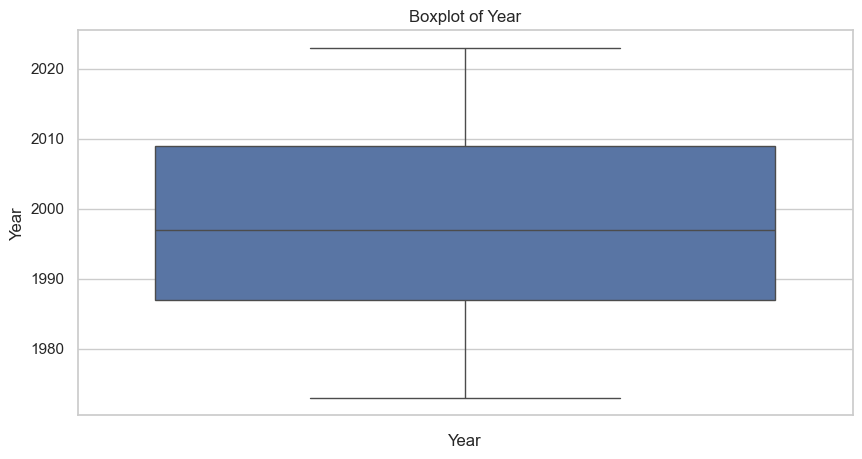

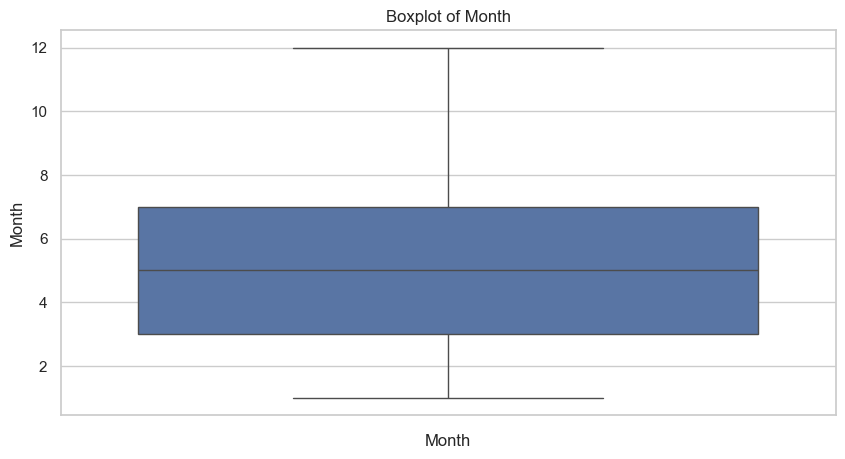

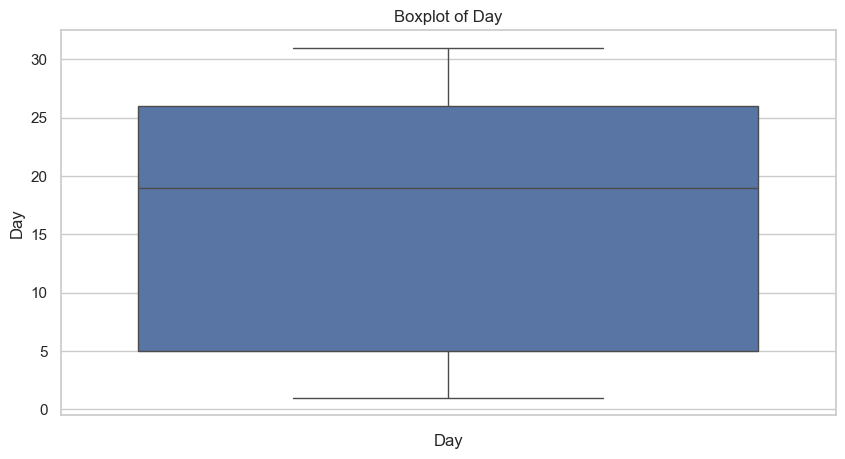

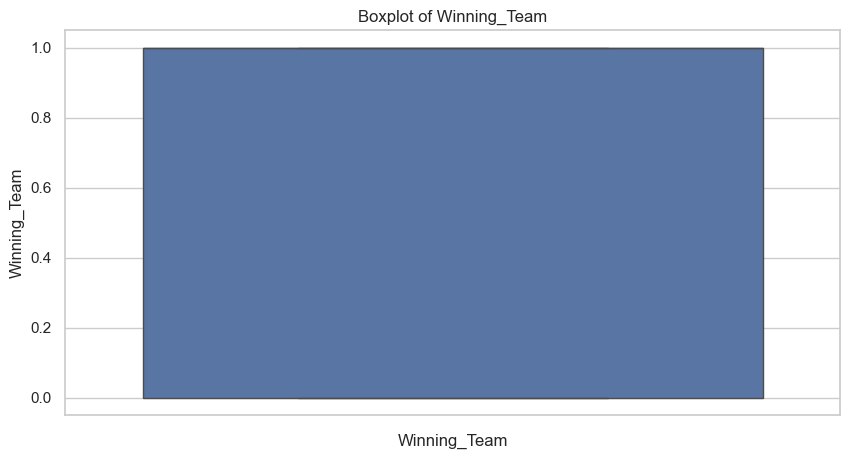

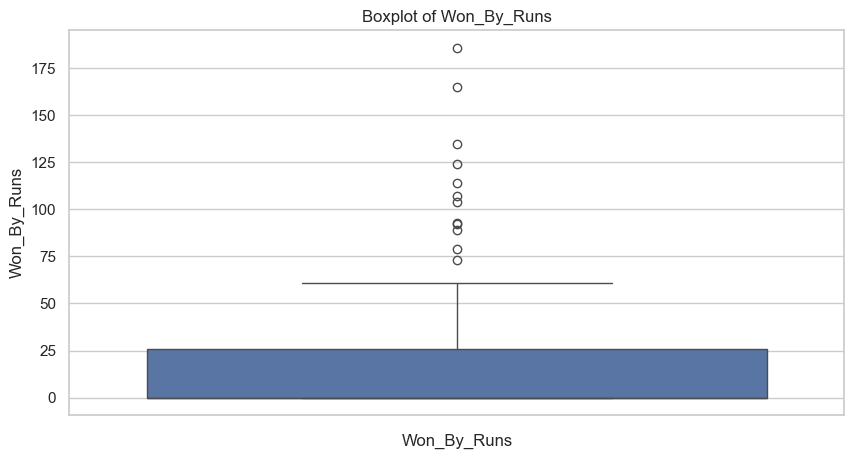

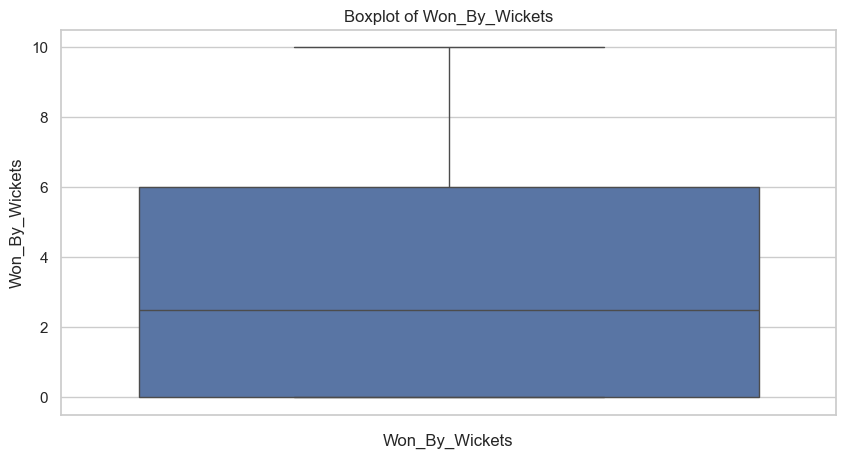

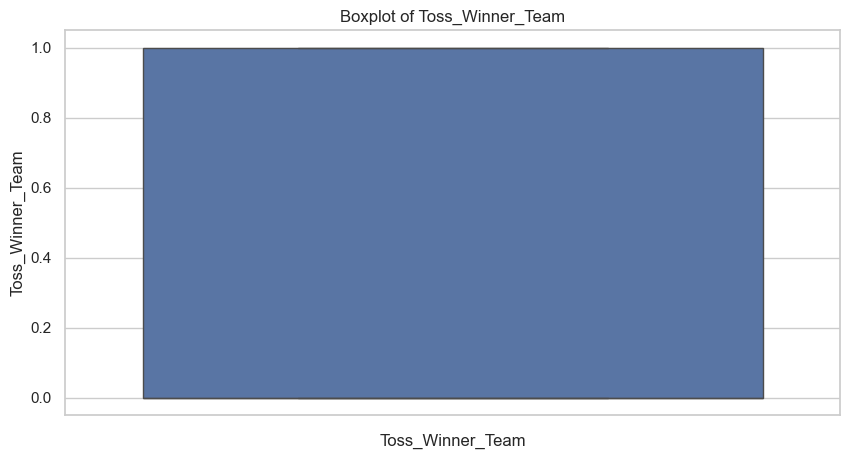

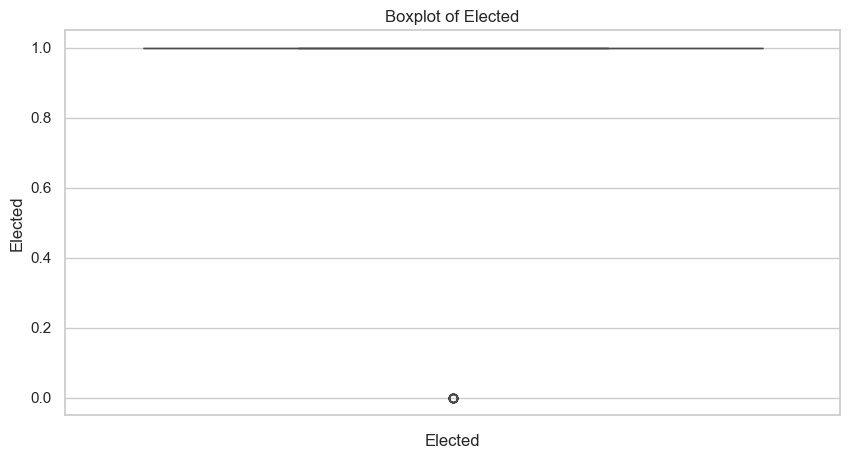

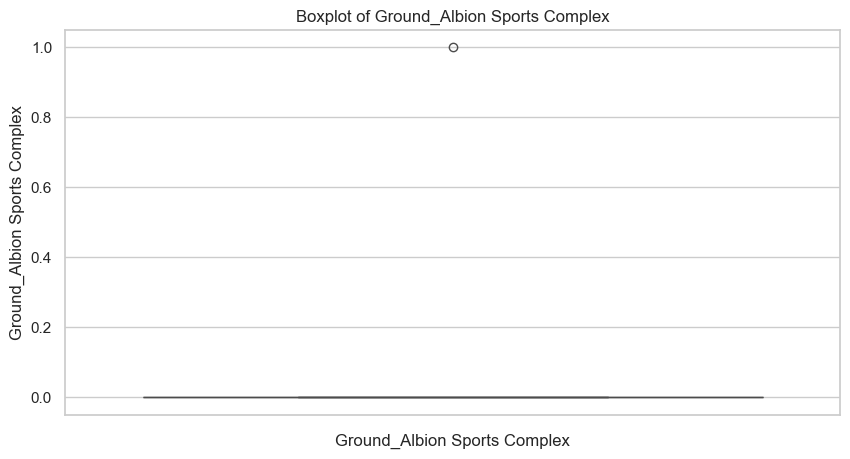

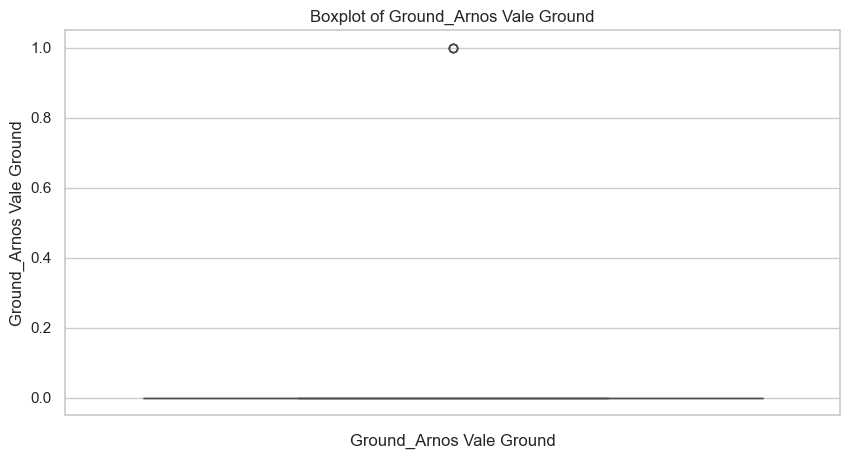

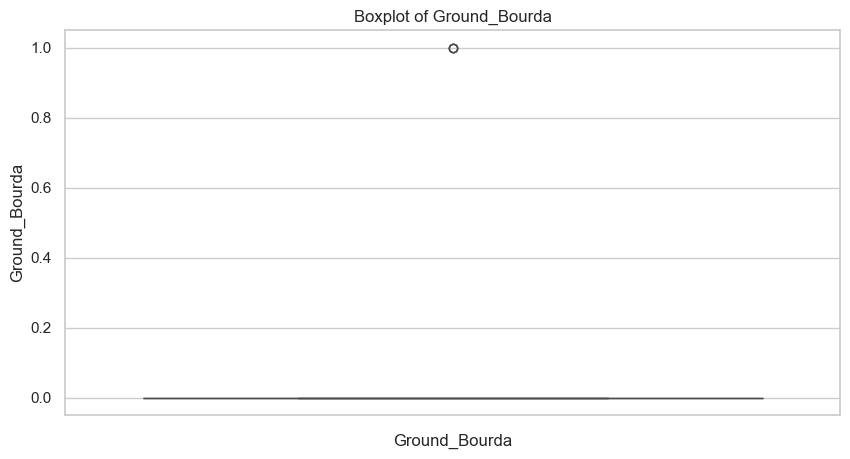

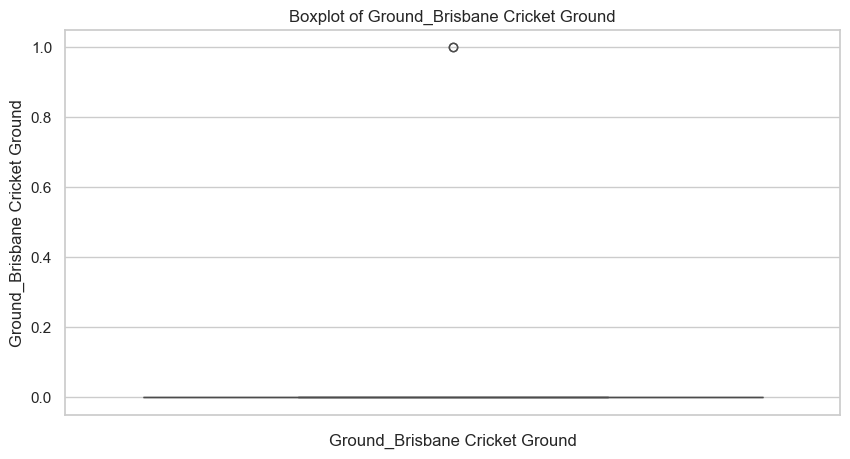

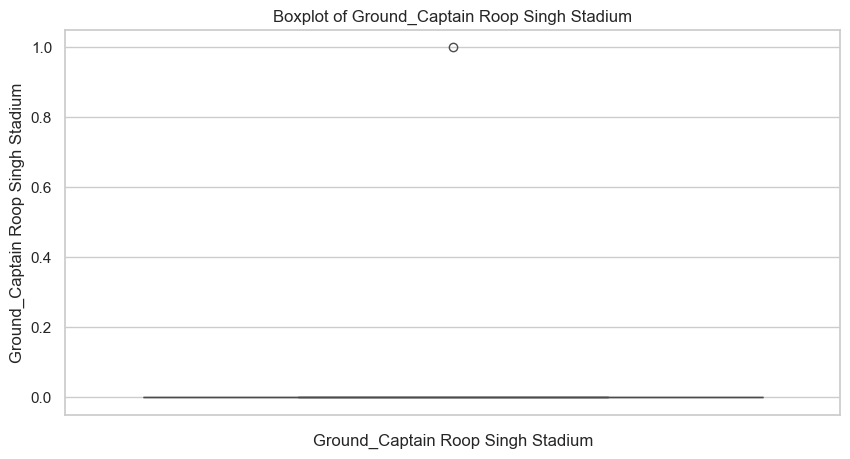

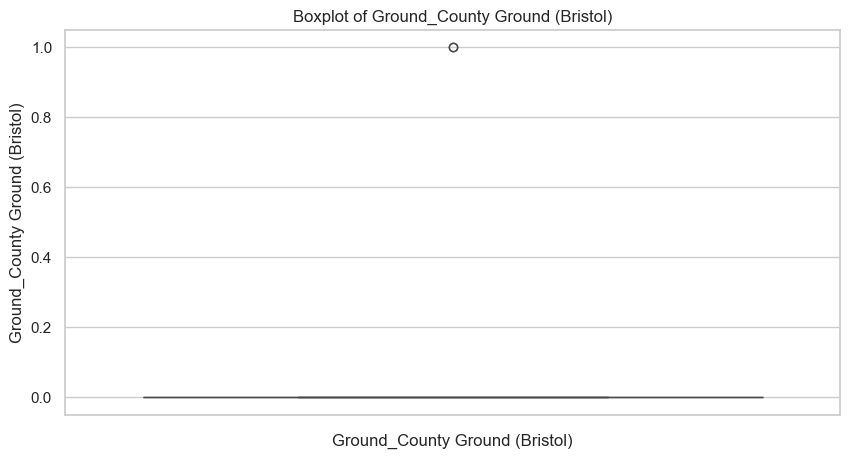

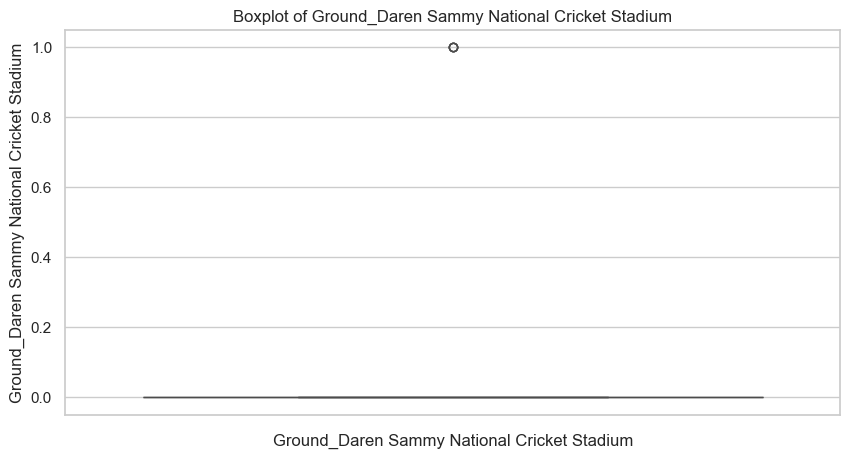

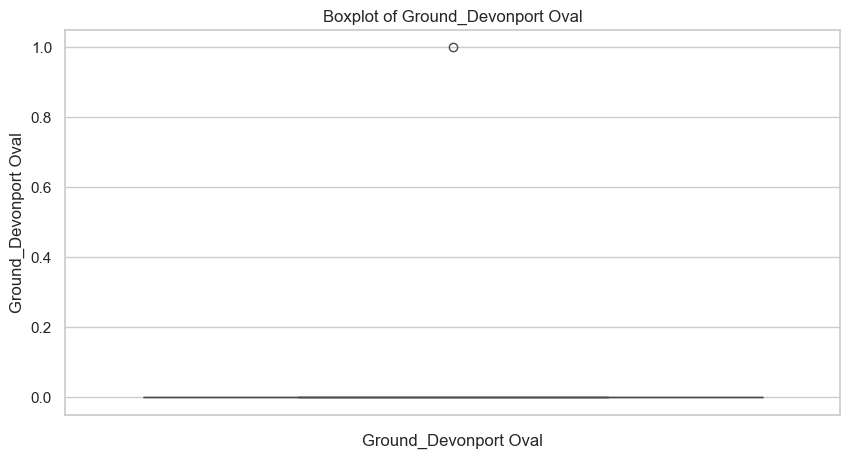

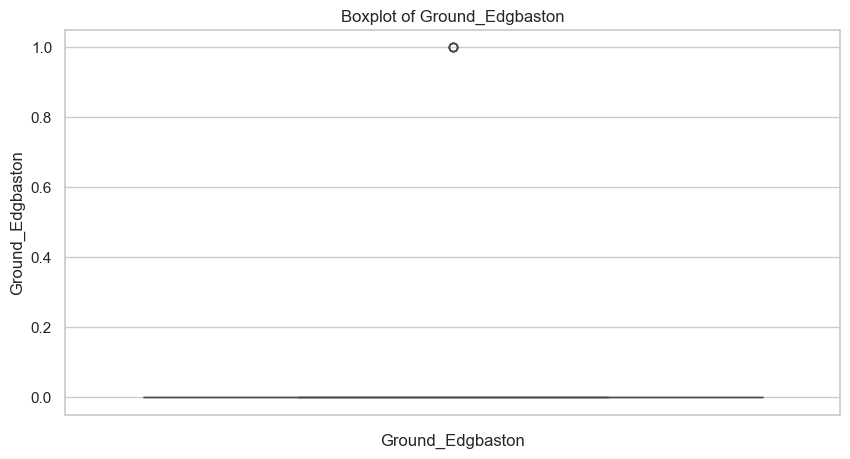

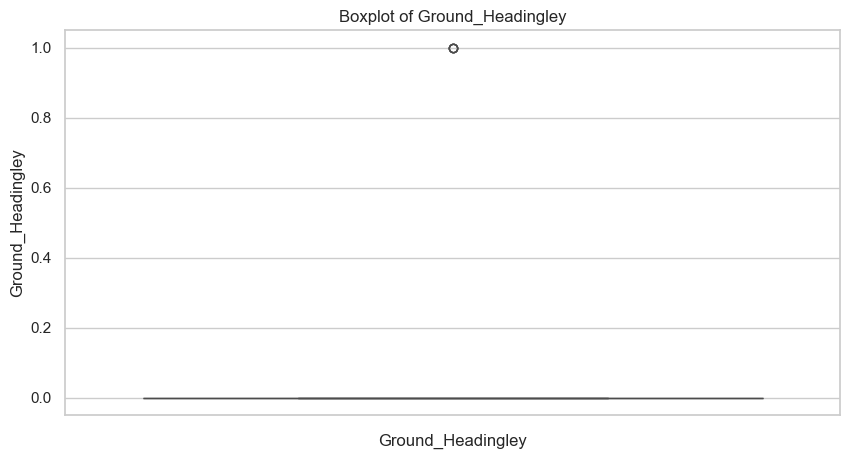

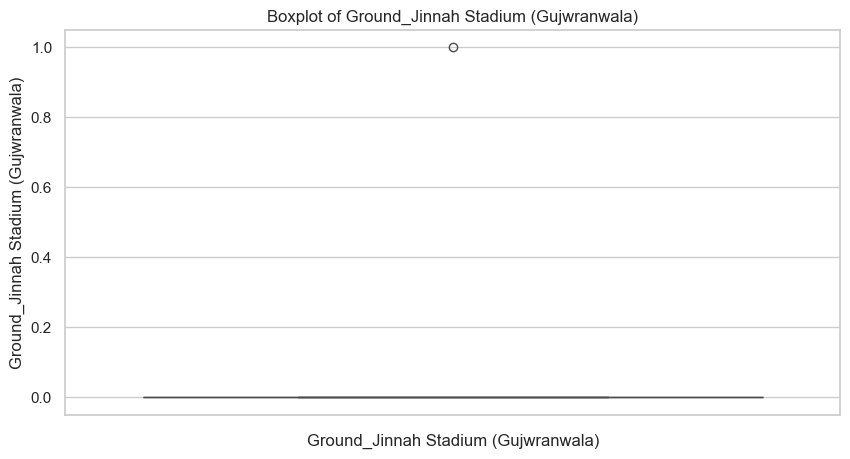

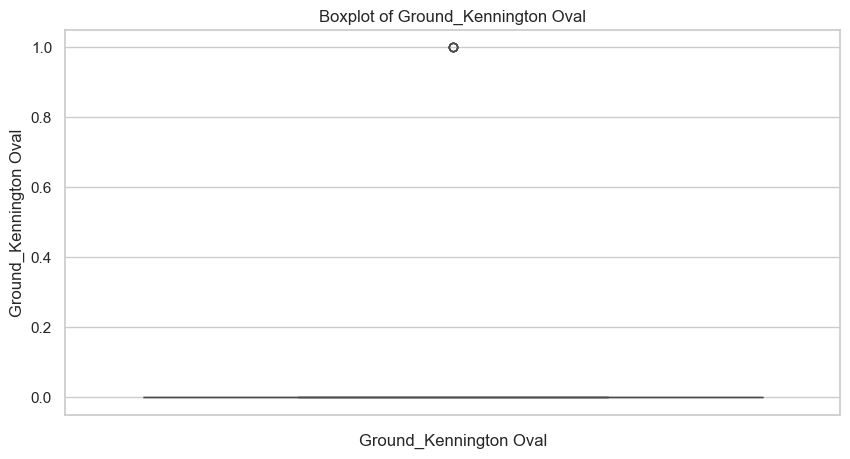

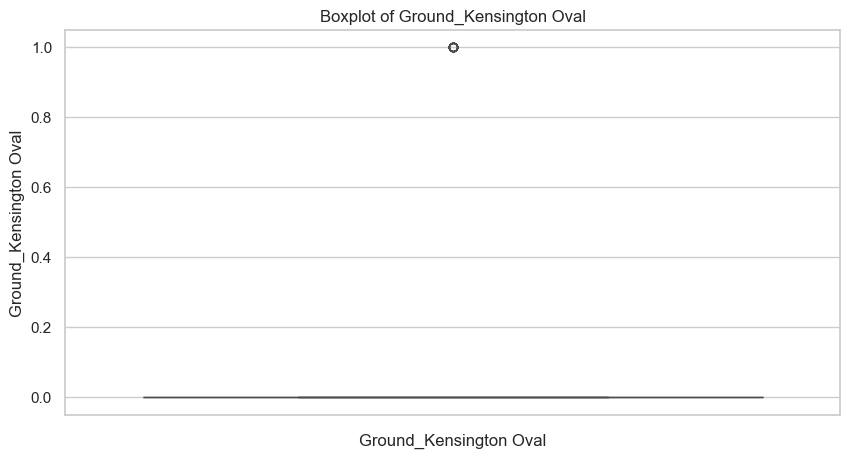

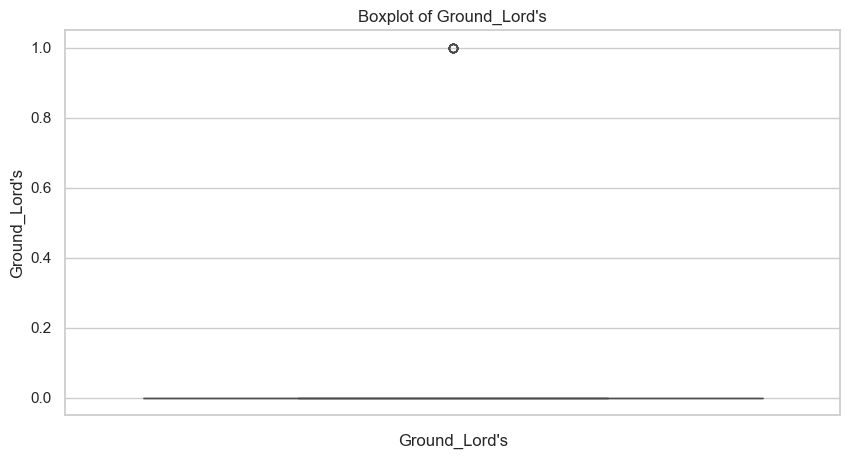

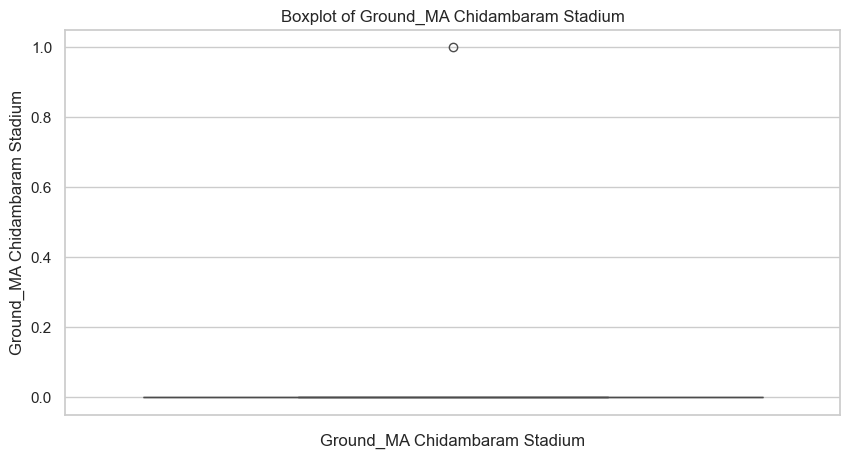

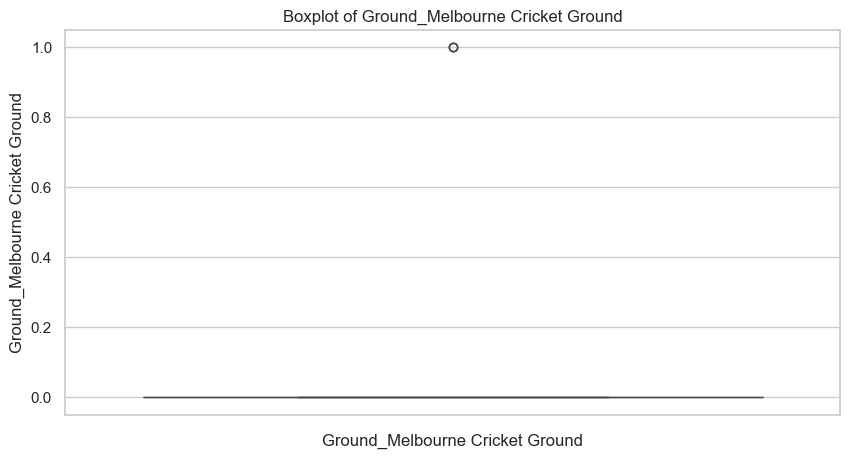

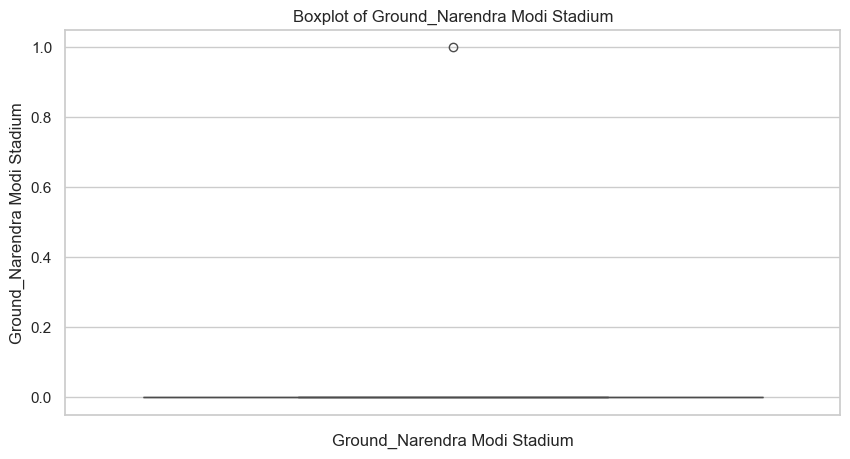

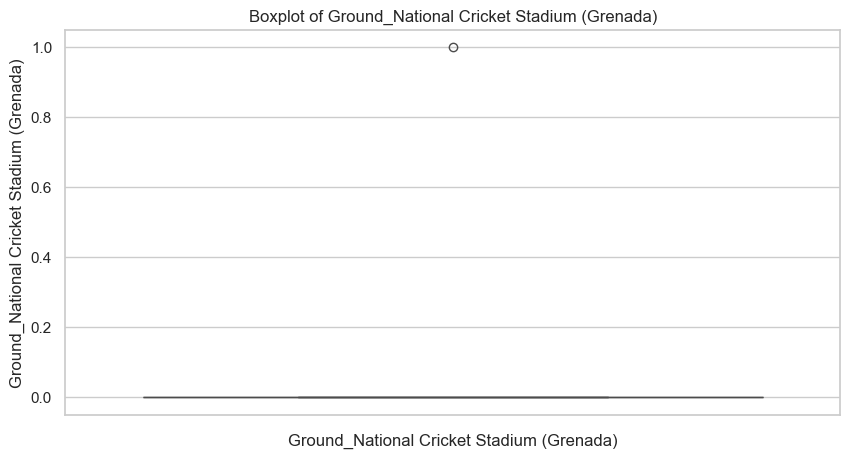

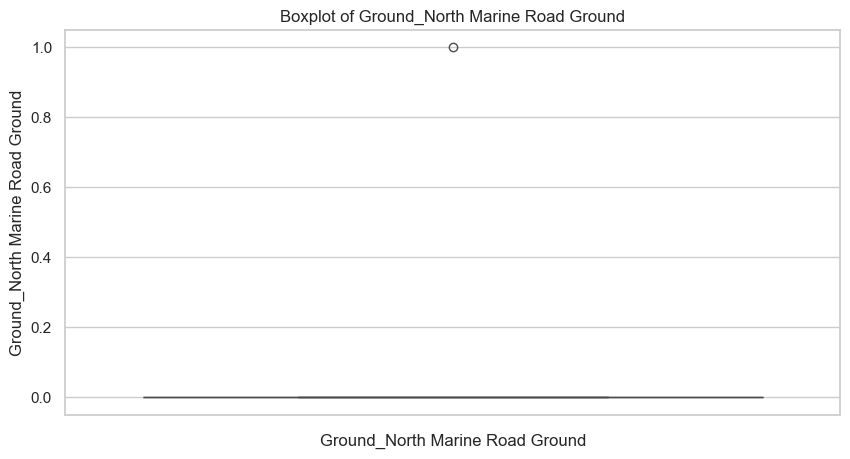

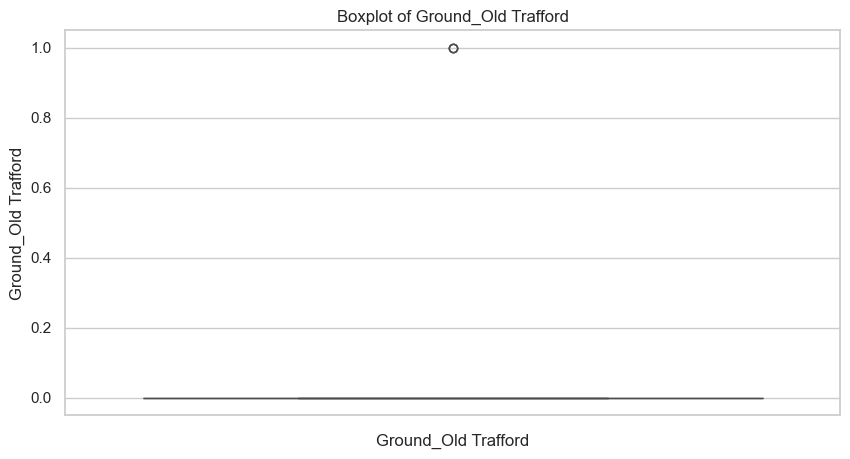

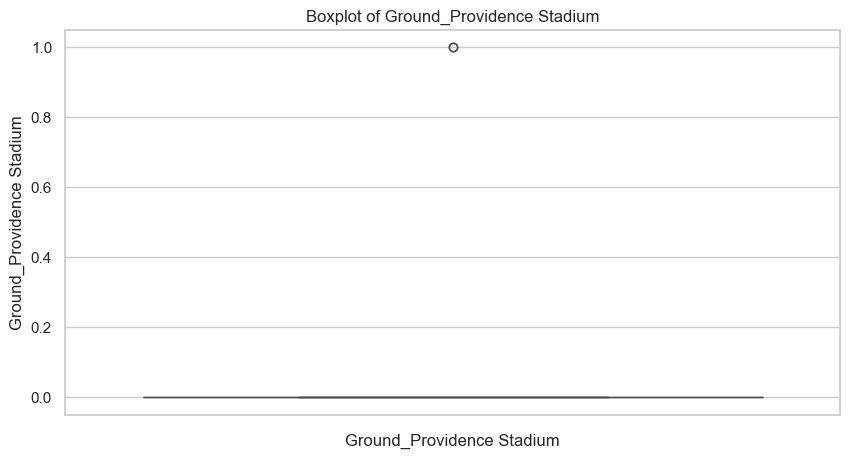

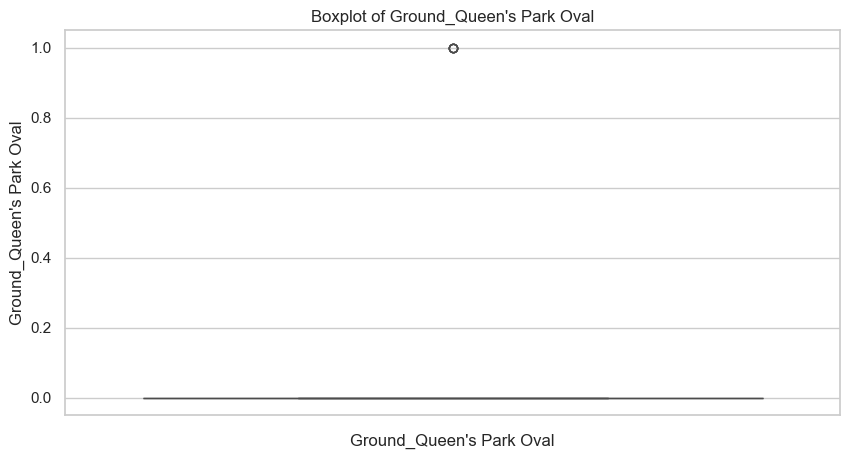

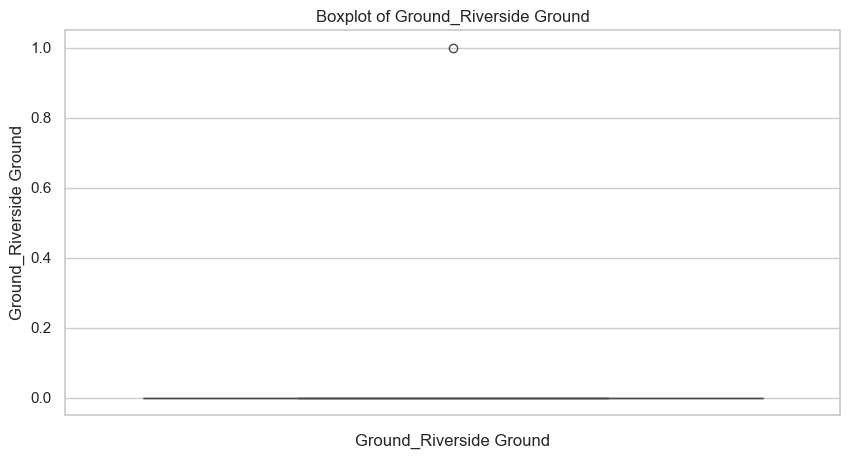

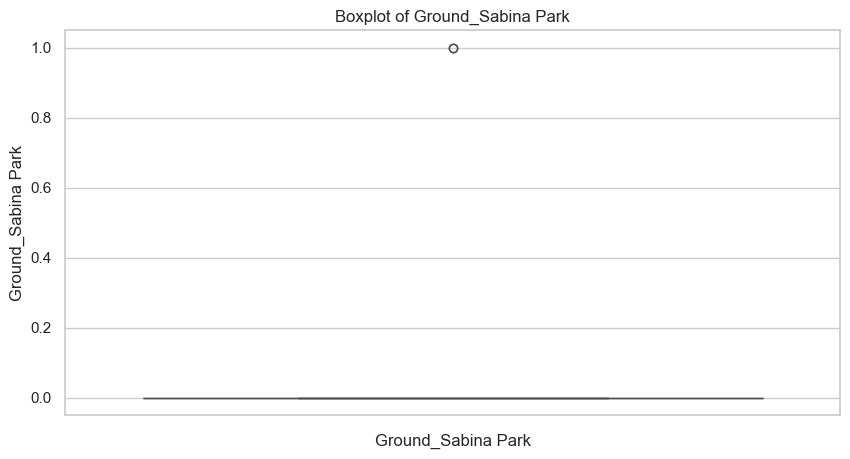

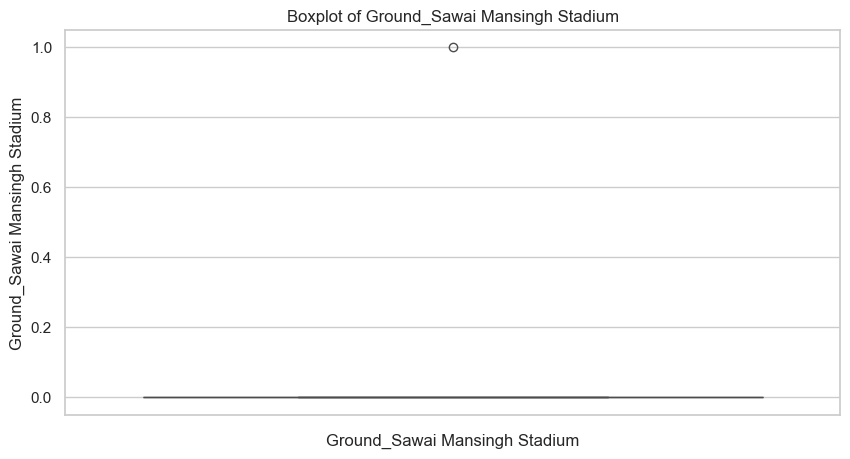

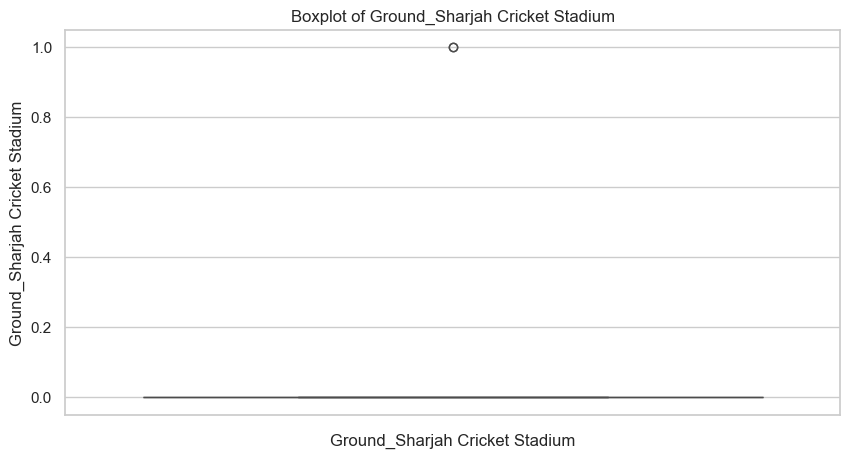

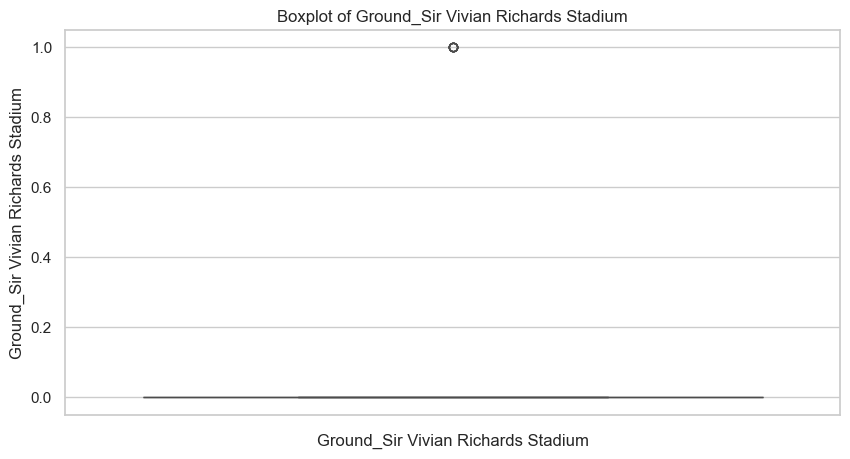

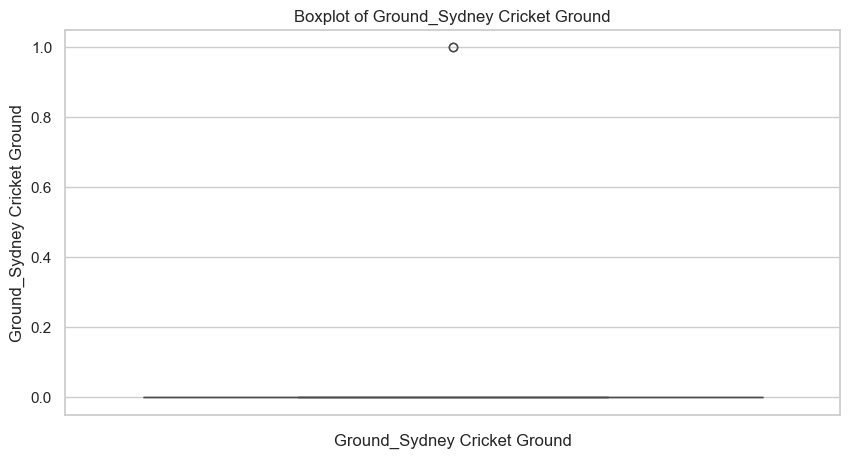

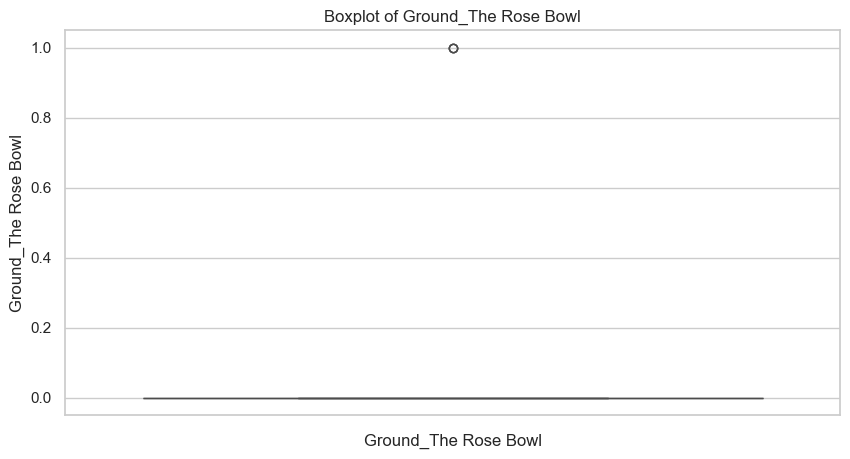

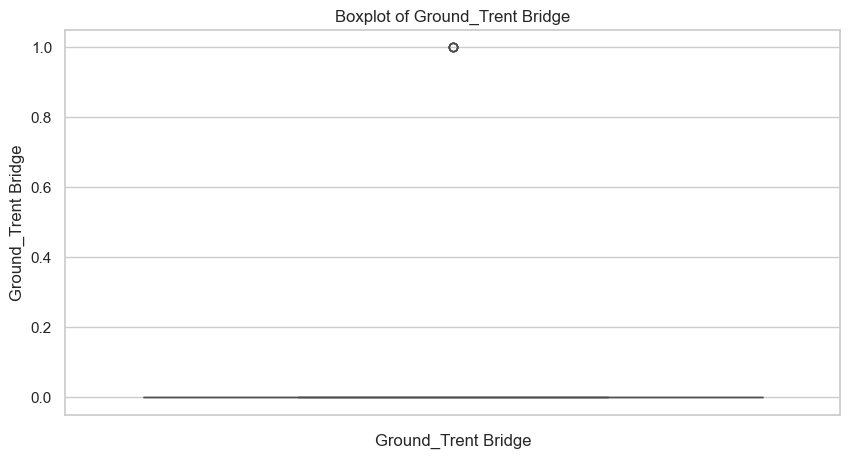

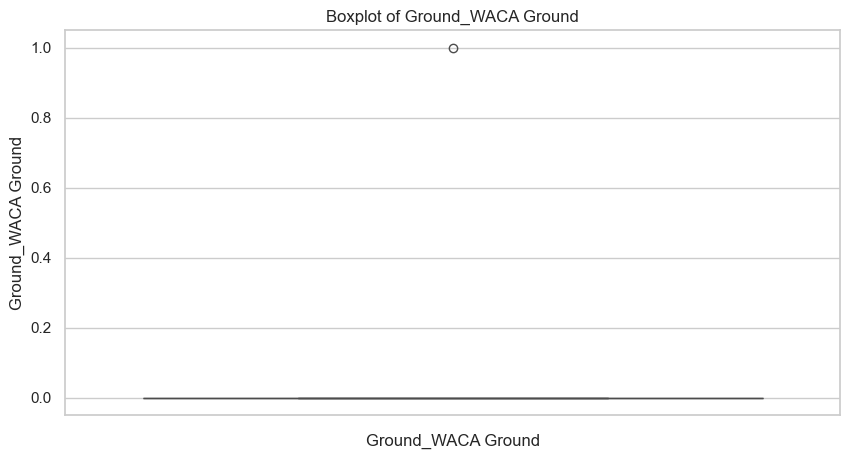

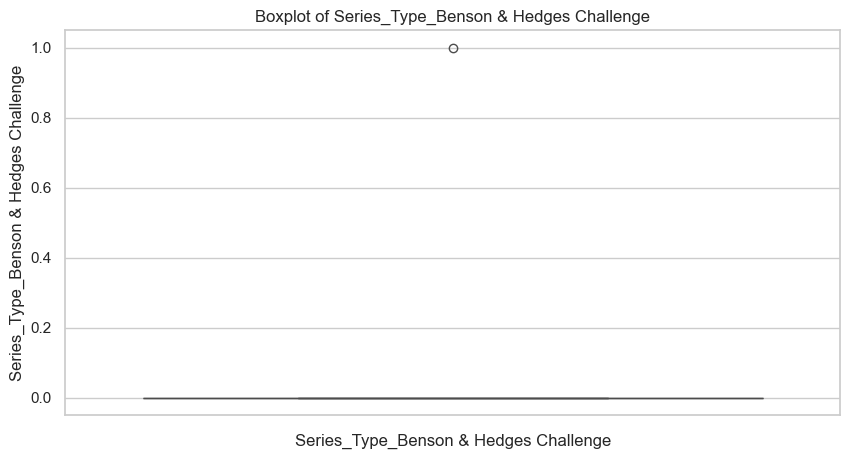

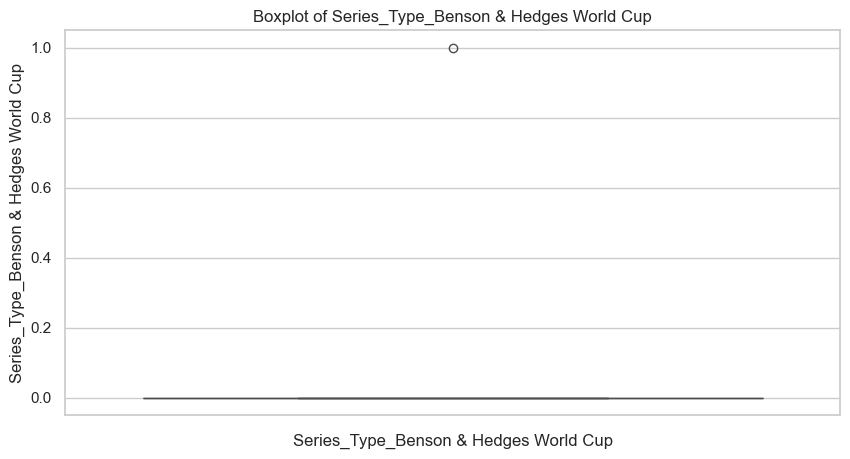

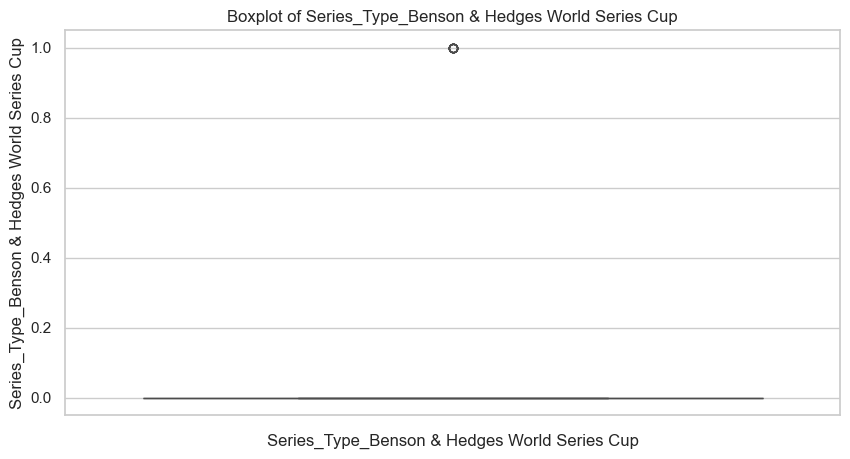

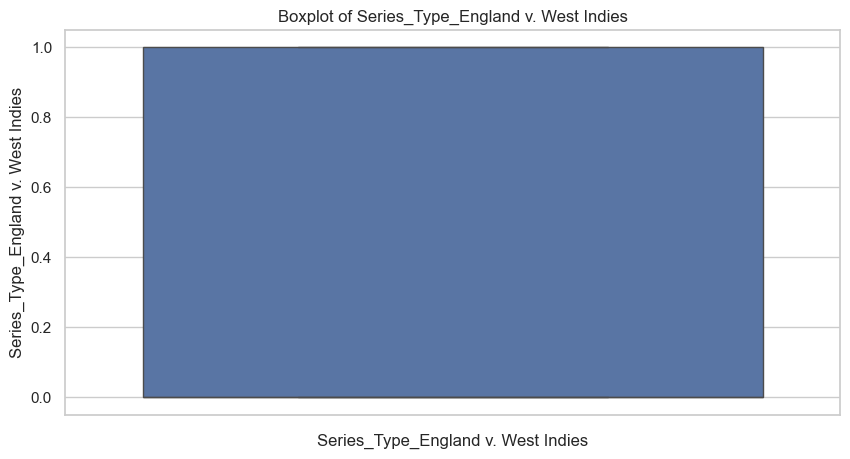

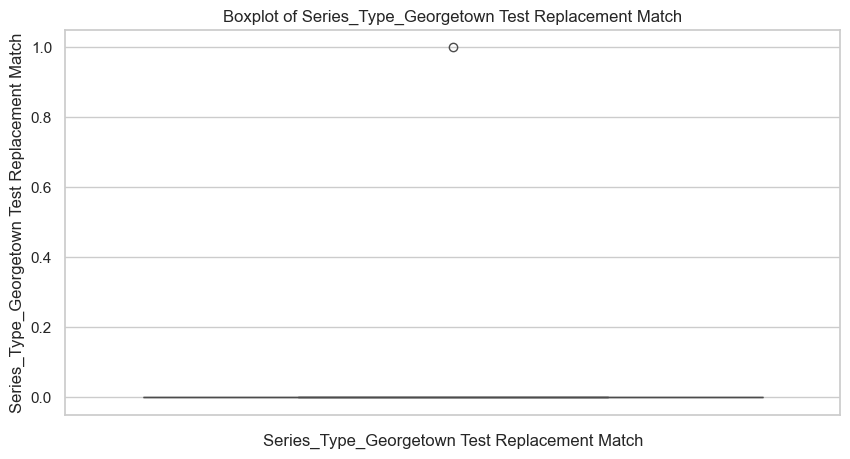

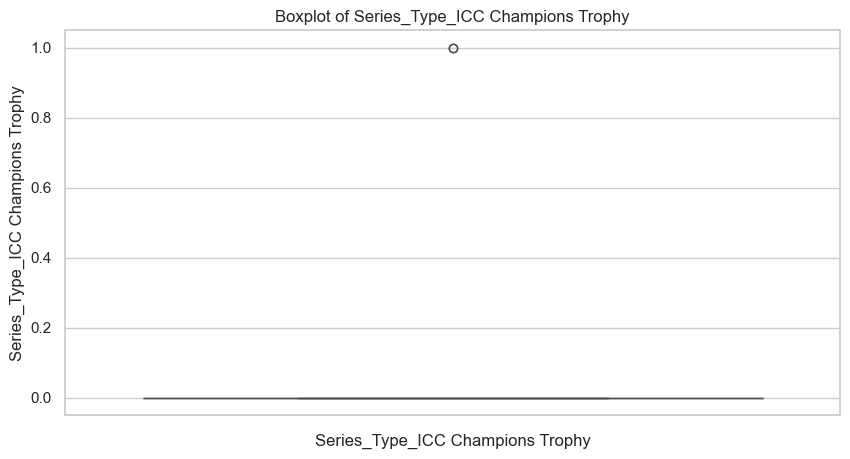

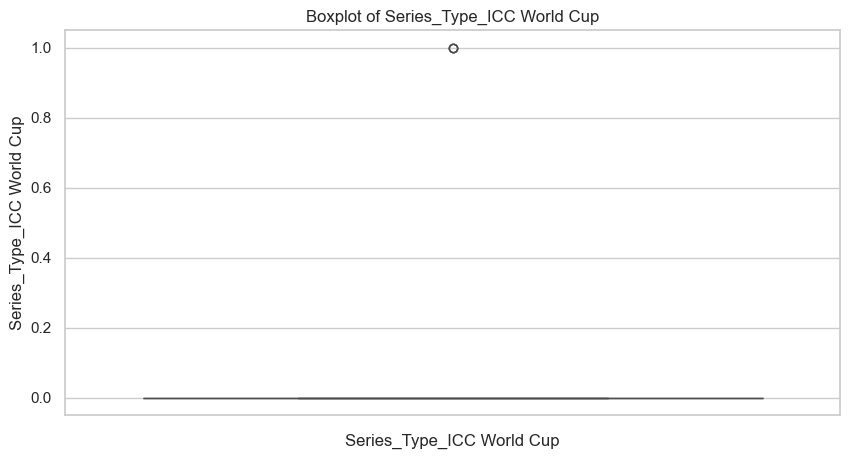

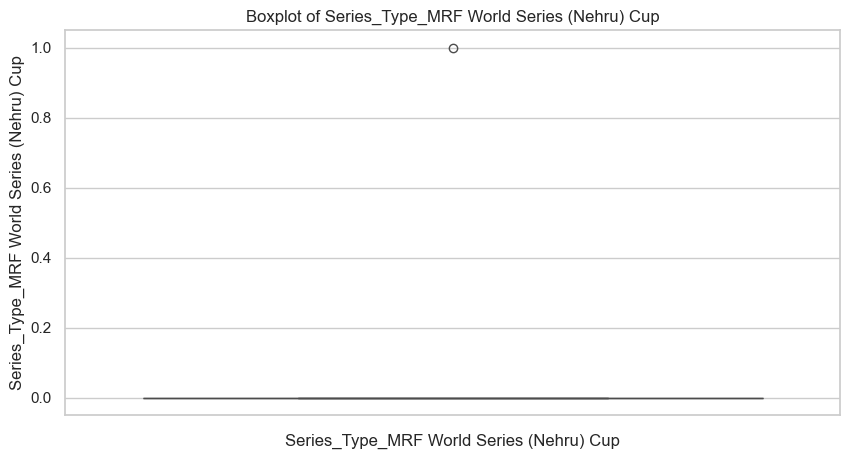

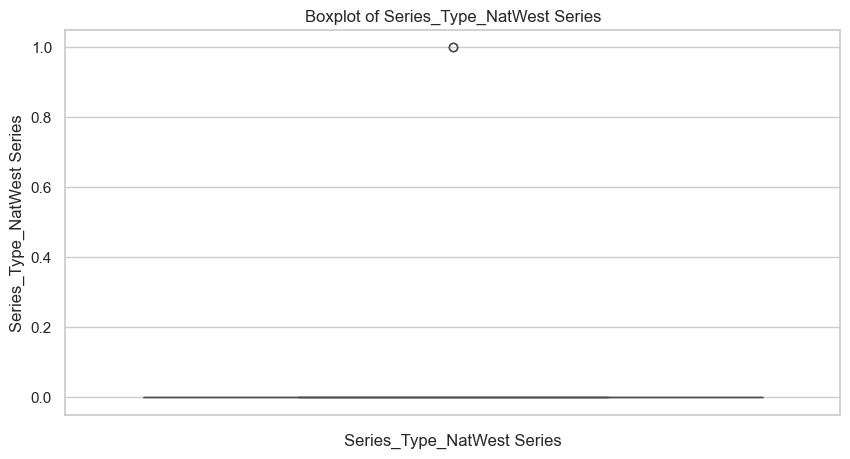

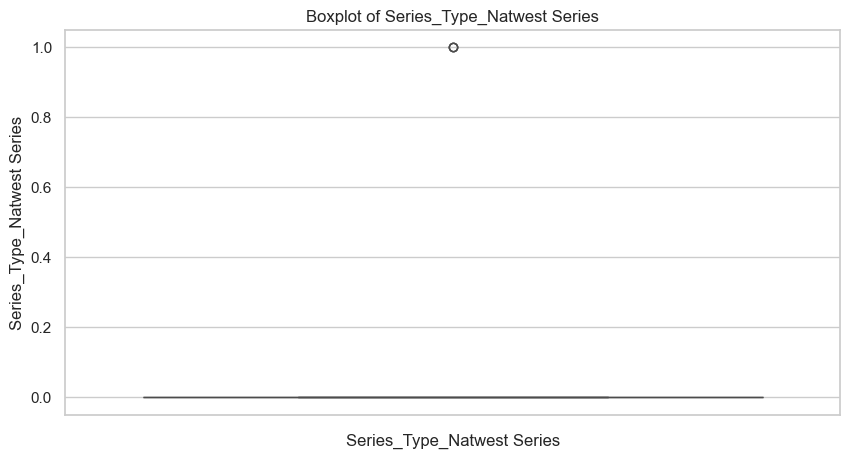

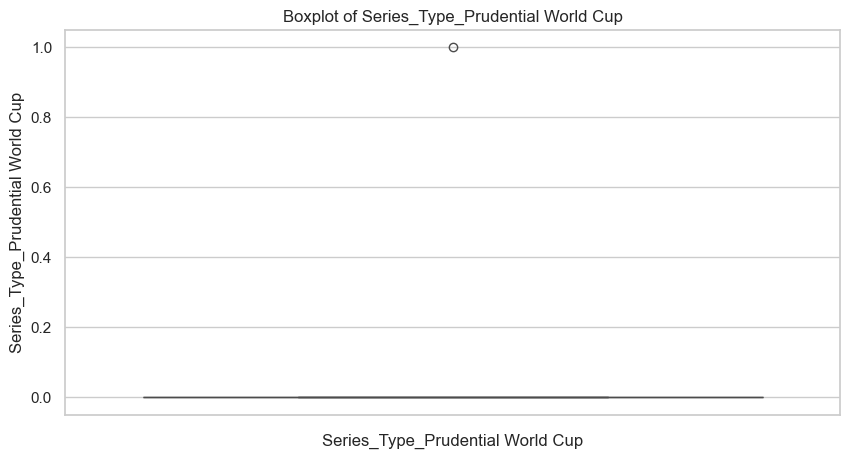

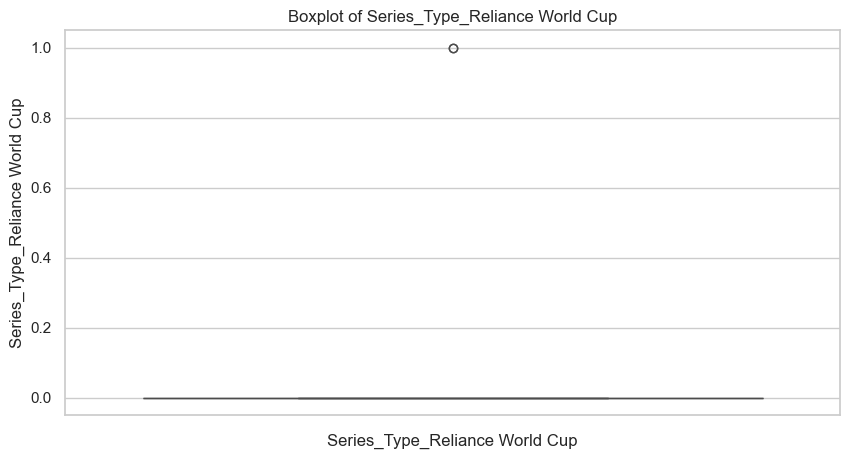

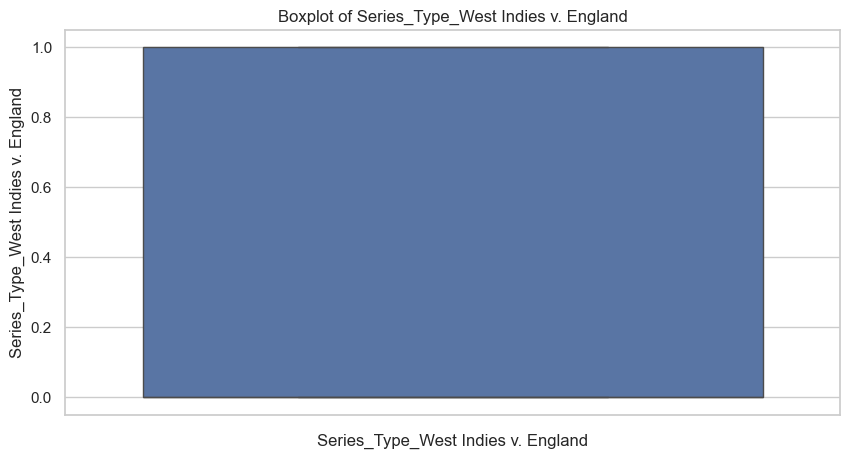

In [21]:
sns.set(style="whitegrid")
numeric_cols = df.select_dtypes(include=['int32', 'float64']).columns.tolist()
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

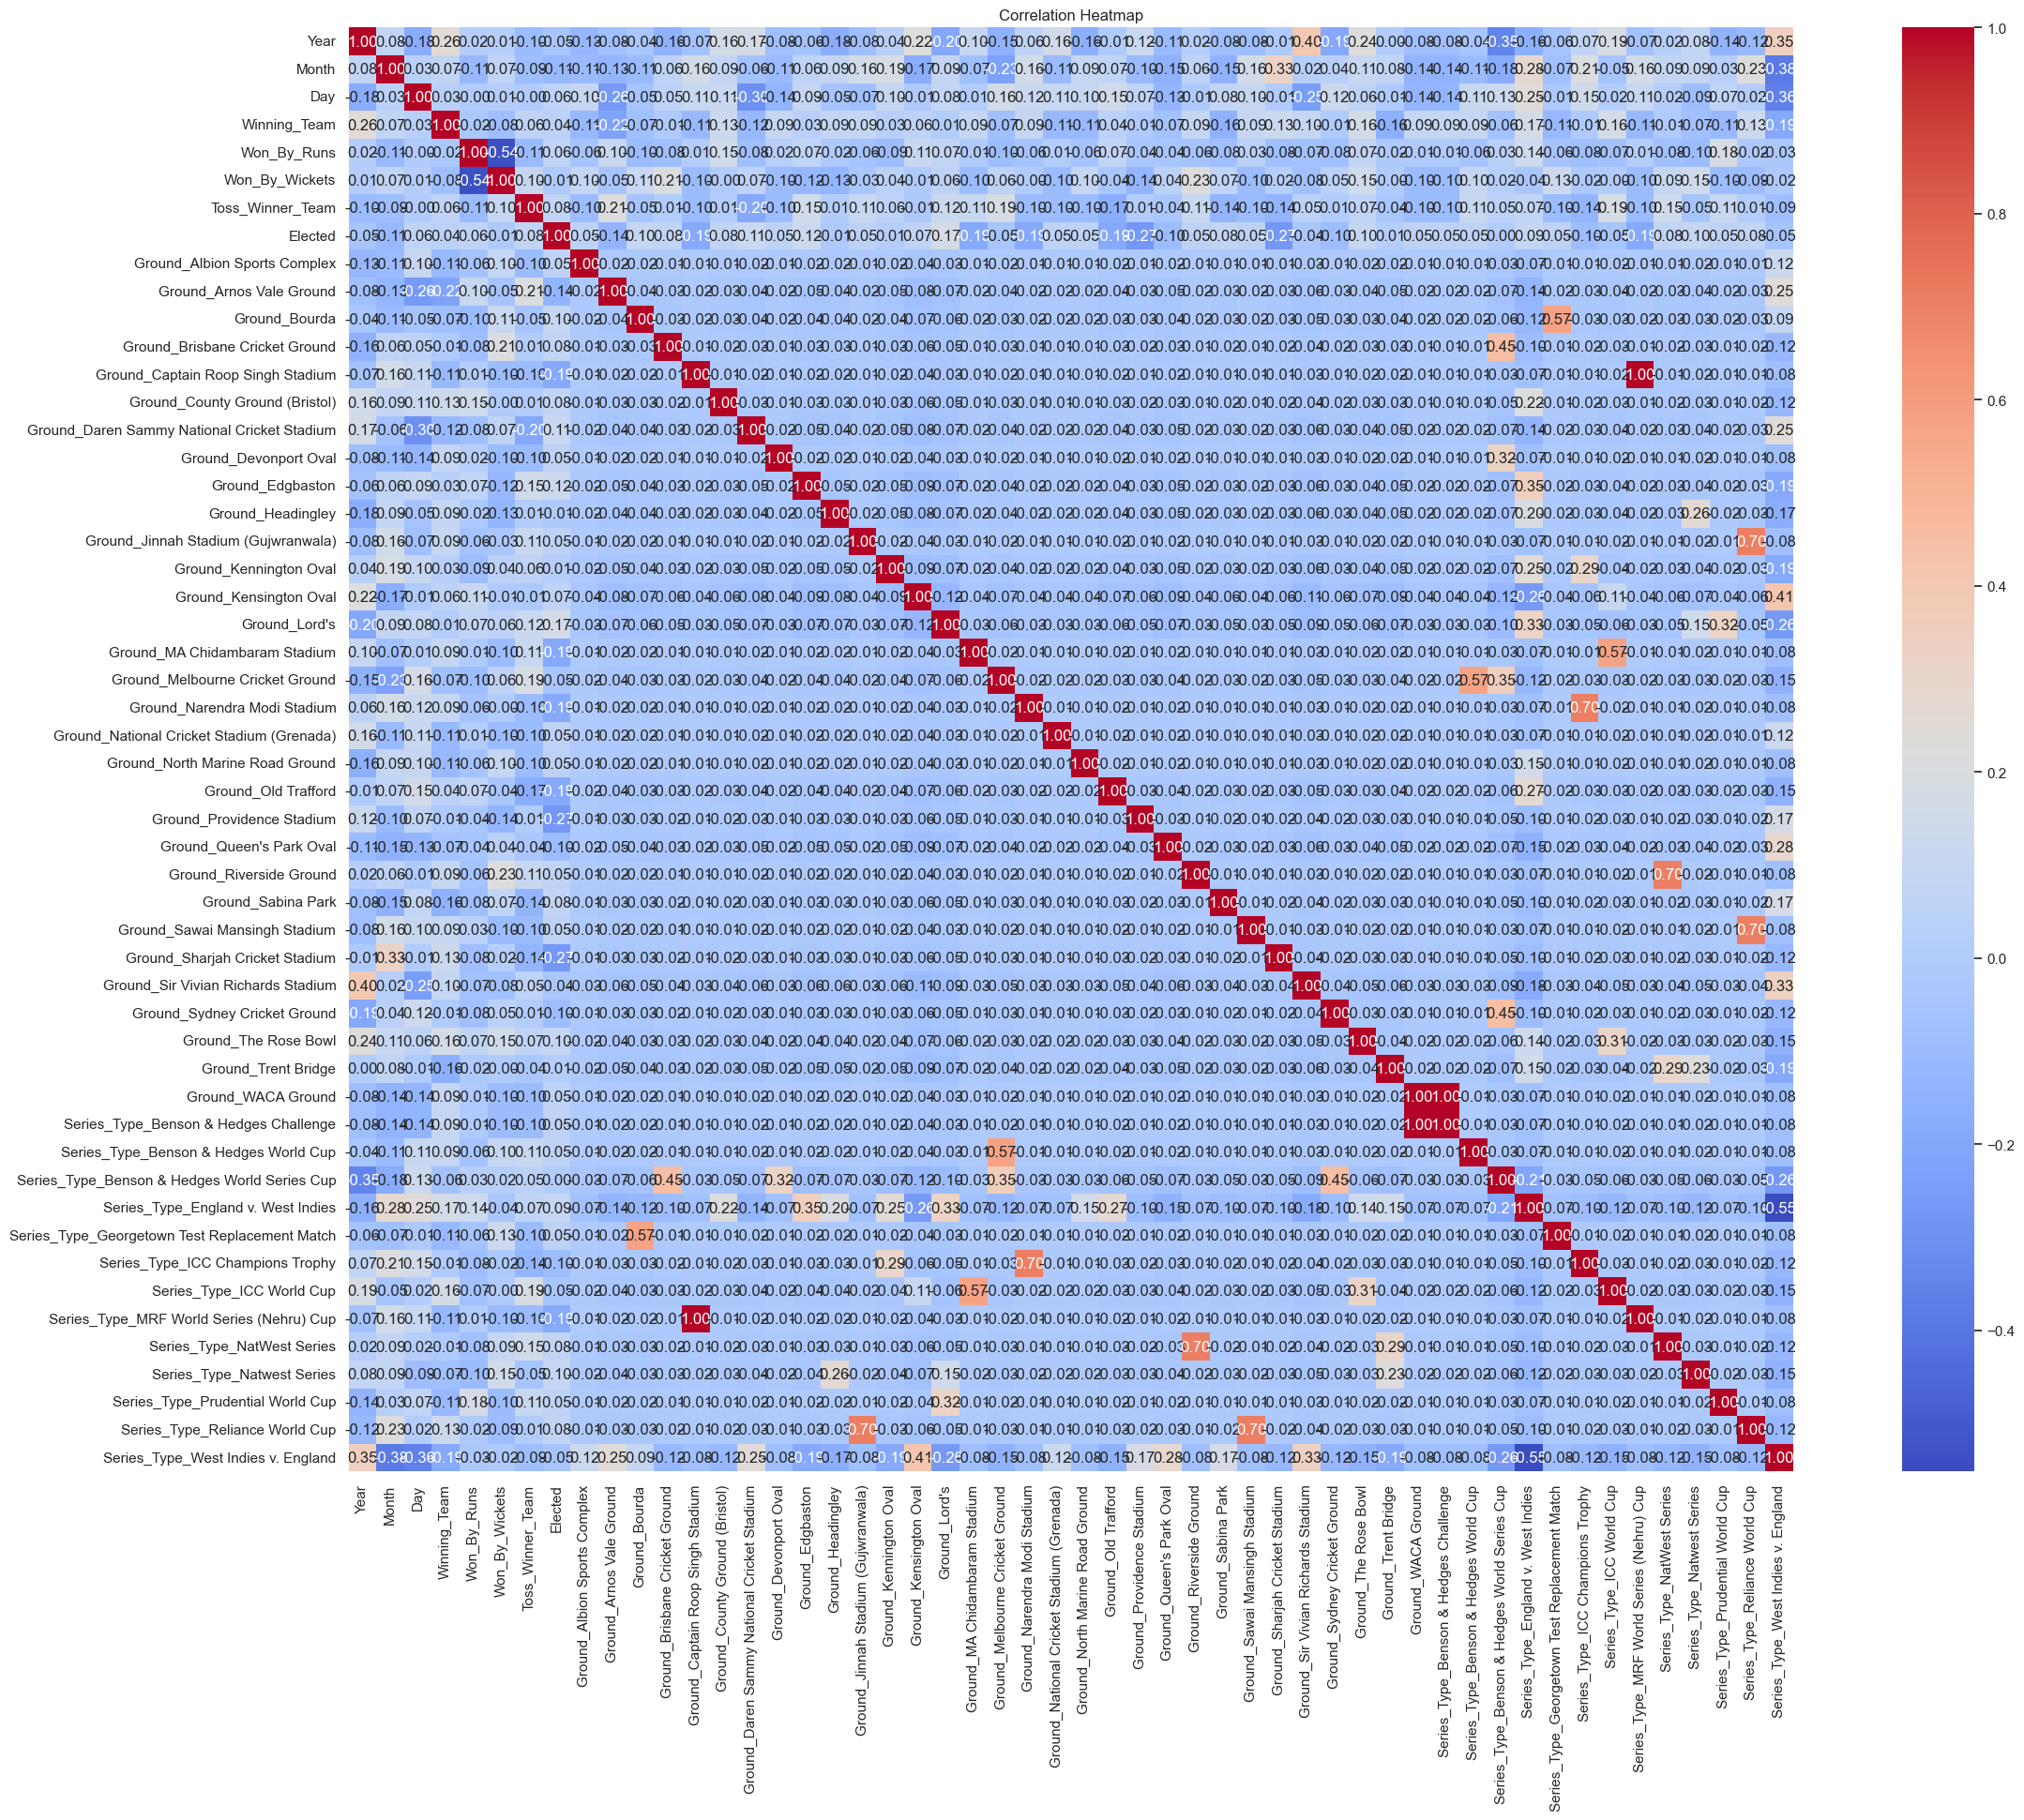

In [22]:
correlation_matrix = df.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

### TOSS WINNER ODDS

In [66]:
toss_analysis = df.groupby(['Toss_Winner_Team', 'Winning_Team']).size().unstack(fill_value=0)
toss_analysis['Win_Percentage'] = (toss_analysis[1] / (toss_analysis[0] + toss_analysis[1])) * 100
toss_analysis['Odds'] = 1 / (toss_analysis['Win_Percentage'] / 100)
toss_analysis.index = ['West Indies', 'England']
print("Toss Winner win% and odds:")
print(toss_analysis[['Win_Percentage', 'Odds']])


ground_analysis = df.groupby(['Ground_Sir Vivian Richards Stadium', 'Winning_Team']).size().unstack(fill_value=0)
ground_analysis['Win_Percentage'] = (ground_analysis[1] / (ground_analysis[0] + ground_analysis[1])) * 100
ground_analysis.index = ['West Indies', 'England']
print("\nGround Analysis:")
print(ground_analysis[['Win_Percentage']])


Toss Winner win% and odds:
Winning_Team  Win_Percentage      Odds
West Indies        50.980392  1.961538
England            57.446809  1.740741

Ground Analysis:
Winning_Team  Win_Percentage
West Indies        52.747253
England            71.428571


### MODEL FITTING AND PREDICTIONS

In [71]:

X = df.drop('Winning_Team', axis=1) 
y = df['Winning_Team'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cat_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, 
                               cat_features=[6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], 
                               verbose=0)
cat_model.fit(X_train, y_train)

accuracy = cat_model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

upcoming_match_df = pd.DataFrame({
    'Year': [2024],
    'Month': [10],
    'Day': [31],
    'Won_By_Runs': [0],  
    'Won_By_Wickets': [0],  
    'Ground_Sir Vivian Richards Stadium': [1],
    'Series_Type_West Indies v. England': [1],  
})


upcoming_match_df = upcoming_match_df.reindex(columns=X.columns, fill_value=0)


upcoming_match_pool = Pool(data=upcoming_match_df, cat_features=[6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])

winning_probs = cat_model.predict_proba(upcoming_match_pool)

winning_percentages = winning_probs[0] * 100
odds = [1 / prob if prob > 0 else float('inf') for prob in winning_probs[0]]

teams = ['West Indies', 'England']
for team, percentage, odd in zip(teams, winning_percentages, odds):
    print(f'{team}: Winning Percentage = {percentage:.2f}%, Odds = {odd:.2f}')


Model Accuracy: 80.00%
West Indies: Winning Percentage = 58.06%, Odds = 1.72
England: Winning Percentage = 41.94%, Odds = 2.38
